In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

# Operações com os dados de todos os anos

#### Juntei os dados relacionados à licitação, licitantes, propostas e itens já tratados nos outros notebooks de todos os anos com o comando: cat 2016/arquivo_2016.txt 2017/arquivo_2017.txt 2018/arquivo_2018.txt 2019/arquivo_2019.txt > Todos_os_Anos.txt

In [24]:
licitacoes=pd.read_csv('Todos_os_Anos.txt', sep = ',', low_memory=False)

In [4]:
print(licitacoes.columns.values)

['Unnamed: 0' 'CD_ORGAO' 'NM_ORGAO' 'NR_LICITACAO' 'ANO_LICITACAO'
 'CD_TIPO_MODALIDADE' 'NR_PROCESSO' 'ANO_PROCESSO' 'TP_OBJETO'
 'CD_TIPO_FASE_ATUAL' 'TP_LICITACAO' 'DS_OBJETO' 'VL_LICITACAO'
 'NR_DOCUMENTO' 'DT_PROPOSTA' 'VL_TOTAL_PROPOSTA' 'TP_RESULTADO_PROPOSTA'
 'NR_LOTE' 'NR_ITEM' 'NR_ITEM_ORIGINAL' 'DS_ITEM' 'QT_ITENS'
 'SG_UNIDADE_MEDIDA' 'VL_UNITARIO_HOMOLOGADO' 'VL_TOTAL_HOMOLOGADO'
 'TP_DOCUMENTO']


In [5]:
licitacoes

Unnamed: 0 CD_ORGAO                NM_ORGAO NR_LICITACAO ANO_LICITACAO  \
0             0.0    86800  PM DE BOA VISTA DO SUL          4.0          2016   
1             1.0    86800  PM DE BOA VISTA DO SUL          4.0          2016   
2             2.0    47701           CM DE ESTRELA          1.0          2016   
3             3.0    77200       PM DE MATO LEITÃO          3.0          2016   
4             4.0    77200       PM DE MATO LEITÃO         10.0          2016   
...           ...      ...                     ...          ...           ...   
83580     20904.0    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83581     20905.0    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83582     20906.0    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83583     20907.0    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83584     20908.0    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   

      CD_TIPO_MODALIDADE NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0                    PRP         011         2016       COM   
1                    PRP         011         2016       COM   
2                    PRP        6762         2016       COM   
3                    PRP         014         2016       COM   
4                    PRP         071         2016       COM   
...                  ...         ...          ...       ...   
83580                PRP          17         2019       COM   
83581                PRP          17         2019       COM   
83582                PRP          17         2019       COM   
83583                PRP          17         2019       COM   
83584                PRP          17         2019       COM   

      CD_TIPO_FASE_ATUAL  ... TP_RESULTADO_PROPOSTA NR_LOTE NR_ITEM  \
0                    ADH  ...                     C       1       2   
1                    ADH  ...                     C       1       1   
2                    ADH  ...                     C       1       1   
3                    ADH  ...                     C       1       1   
4                    ADH  ...                     C       1       1   
...                  ...  ...                   ...     ...     ...   
83580                ADH  ...                     C       1       2   
83581                ADH  ...                     C       1       4   
83582                ADH  ...                     C       1       5   
83583                ADH  ...                     C       1       3   
83584                ADH  ...                     C       1       1   

      NR_ITEM_ORIGINAL                                            DS_ITEM  \
0                    2  LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...   
1                    1  LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...   
2                    1                    Aquisição Plataforma Elevatória   
3                    1  compra de 1 motocicleta, para o programa SUA N...   
4                    1  Compra de cerca e portão de PVC para o Muro da...   
...                ...                                                ...   
83580                2  Lavador de mandioca (01 confeccionado em aço i...   
83581                4  Câmara Fria - com PLUG-IN 220V Monofásico, Sis...   
83582                5  Balança eletromecânica, , com indicador de pes...   
83583                3  Equipamento para embalar a vácuo, Painel digit...   
83584                1  Descascador de mandioca, com capacidade de pro...   

      QT_ITENS SG_UNIDADE_MEDIDA VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
0          2.0                UN                 1060.0             2120.00   
1         10.0                UN                 1060.0            10600.00   
2          1.0                UN                47900.0            47900.00   
3          1.0                UN                 7499.0             7499.00   
4          1.0                UN                 9500.0             9500.00   
...        ...           

# Removendo a coluna Unnamed, que são os índices dos outros arqruivos

In [25]:
licitacoes = licitacoes.drop(licitacoes.columns[0], axis=1)

In [8]:
licitacoes

CD_ORGAO                NM_ORGAO NR_LICITACAO ANO_LICITACAO  \
0        86800  PM DE BOA VISTA DO SUL          4.0          2016   
1        86800  PM DE BOA VISTA DO SUL          4.0          2016   
2        47701           CM DE ESTRELA          1.0          2016   
3        77200       PM DE MATO LEITÃO          3.0          2016   
4        77200       PM DE MATO LEITÃO         10.0          2016   
...        ...                     ...          ...           ...   
83580    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83581    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83582    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83583    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83584    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   

      CD_TIPO_MODALIDADE NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0                    PRP         011         2016       COM   
1                    PRP         011         2016       COM   
2                    PRP        6762         2016       COM   
3                    PRP         014         2016       COM   
4                    PRP         071         2016       COM   
...                  ...         ...          ...       ...   
83580                PRP          17         2019       COM   
83581                PRP          17         2019       COM   
83582                PRP          17         2019       COM   
83583                PRP          17         2019       COM   
83584                PRP          17         2019       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA NR_LOTE  \
0                    ADH          MPR  ...                     C       1   
1                    ADH          MPR  ...                     C       1   
2                    ADH          MPR  ...                     C       1   
3                    ADH          MPR  ...                     C       1   
4                    ADH          MPR  ...                     C       1   
...                  ...          ...  ...                   ...     ...   
83580                ADH          MPR  ...                     C       1   
83581                ADH          MPR  ...                     C       1   
83582                ADH          MPR  ...                     C       1   
83583                ADH          MPR  ...                     C       1   
83584                ADH          MPR  ...                     C       1   

      NR_ITEM NR_ITEM_ORIGINAL  \
0           2                2   
1           1                1   
2           1                1   
3           1                1   
4           1                1   
...       ...              ...   
83580       2                2   
83581       4                4   
83582       5                5   
83583       3                3   
83584       1                1   

                                                 DS_ITEM QT_ITENS  \
0      LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...      2.0   
1      LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...     10.0   
2                        Aquisição Plataforma Elevatória      1.0   
3      compra de 1 motocicleta, para o programa SUA N...      1.0   
4      Compra de cerca e portão de PVC para o Muro da...      1.0   
...                                                  ...      ...   
83580  Lavador de mandioca (01 confeccionado em aço i...     2.00   
83581  Câmara Fria - com PLUG-IN 220V Monofásico, Sis...     1.00   
83582  Balança eletromecânica, , com indicador de pes...     1.00   
83583  Equipamento para embalar a vácuo, Painel digit...     1.00   
83584  Descascador de mandioca, com capacidade de pro...     1.00   

      SG_UNIDADE_MEDIDA VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
0                    UN                 1060.0             2120.00   
1                    UN                 1060.0            10600.00   
2                    UN                47900.0            4

# Checando se há linhas duplicadas

In [26]:
print("Duplicated values: ", licitacoes.duplicated().sum())

Duplicated values:  2


In [27]:
duplicateRowsDF = licitacoes[licitacoes.duplicated()]
duplicateRowsDF

CD_ORGAO  NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  CD_TIPO_MODALIDADE  \
37612  CD_ORGAO  NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  CD_TIPO_MODALIDADE   
62735  CD_ORGAO  NM_ORGAO  NR_LICITACAO  ANO_LICITACAO  CD_TIPO_MODALIDADE   

       NR_PROCESSO  ANO_PROCESSO  TP_OBJETO  CD_TIPO_FASE_ATUAL  TP_LICITACAO  \
37612  NR_PROCESSO  ANO_PROCESSO  TP_OBJETO  CD_TIPO_FASE_ATUAL  TP_LICITACAO   
62735  NR_PROCESSO  ANO_PROCESSO  TP_OBJETO  CD_TIPO_FASE_ATUAL  TP_LICITACAO   

       ...  TP_RESULTADO_PROPOSTA  NR_LOTE  NR_ITEM  NR_ITEM_ORIGINAL  \
37612  ...  TP_RESULTADO_PROPOSTA  NR_LOTE  NR_ITEM  NR_ITEM_ORIGINAL   
62735  ...  TP_RESULTADO_PROPOSTA  NR_LOTE  NR_ITEM  NR_ITEM_ORIGINAL   

       DS_ITEM  QT_ITENS  SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO  \
37612  DS_ITEM  QT_ITENS  SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO   
62735  DS_ITEM  QT_ITENS  SG_UNIDADE_MEDIDA  VL_UNITARIO_HOMOLOGADO   

       VL_TOTAL_HOMOLOGADO  TP_DOCUMENTO  
37612  VL_TOTAL_HOMOLOGADO  TP_DOCUMENTO  
62735  VL_TOTAL_HOMOLOGADO  TP_DOCUMENTO  

[2 rows x 25 columns]

# Ao concatenar o cabeçalho estava duplicado, aqui vou removê-los deixando apenas o primeiro

In [28]:
licitacoes.drop_duplicates(keep=False,inplace=True) 
licitacoes

CD_ORGAO                NM_ORGAO NR_LICITACAO ANO_LICITACAO  \
0        86800  PM DE BOA VISTA DO SUL          4.0          2016   
1        86800  PM DE BOA VISTA DO SUL          4.0          2016   
2        47701           CM DE ESTRELA          1.0          2016   
3        77200       PM DE MATO LEITÃO          3.0          2016   
4        77200       PM DE MATO LEITÃO         10.0          2016   
...        ...                     ...          ...           ...   
83580    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83581    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83582    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83583    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   
83584    79800   PM DE SAGRADA FAMÍLIA          7.0          2019   

      CD_TIPO_MODALIDADE NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
0                    PRP         011         2016       COM   
1                    PRP         011         2016       COM   
2                    PRP        6762         2016       COM   
3                    PRP         014         2016       COM   
4                    PRP         071         2016       COM   
...                  ...         ...          ...       ...   
83580                PRP          17         2019       COM   
83581                PRP          17         2019       COM   
83582                PRP          17         2019       COM   
83583                PRP          17         2019       COM   
83584                PRP          17         2019       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA NR_LOTE  \
0                    ADH          MPR  ...                     C       1   
1                    ADH          MPR  ...                     C       1   
2                    ADH          MPR  ...                     C       1   
3                    ADH          MPR  ...                     C       1   
4                    ADH          MPR  ...                     C       1   
...                  ...          ...  ...                   ...     ...   
83580                ADH          MPR  ...                     C       1   
83581                ADH          MPR  ...                     C       1   
83582                ADH          MPR  ...                     C       1   
83583                ADH          MPR  ...                     C       1   
83584                ADH          MPR  ...                     C       1   

      NR_ITEM NR_ITEM_ORIGINAL  \
0           2                2   
1           1                1   
2           1                1   
3           1                1   
4           1                1   
...       ...              ...   
83580       2                2   
83581       4                4   
83582       5                5   
83583       3                3   
83584       1                1   

                                                 DS_ITEM QT_ITENS  \
0      LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...      2.0   
1      LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...     10.0   
2                        Aquisição Plataforma Elevatória      1.0   
3      compra de 1 motocicleta, para o programa SUA N...      1.0   
4      Compra de cerca e portão de PVC para o Muro da...      1.0   
...                                                  ...      ...   
83580  Lavador de mandioca (01 confeccionado em aço i...     2.00   
83581  Câmara Fria - com PLUG-IN 220V Monofásico, Sis...     1.00   
83582  Balança eletromecânica, , com indicador de pes...     1.00   
83583  Equipamento para embalar a vácuo, Painel digit...     1.00   
83584  Descascador de mandioca, com capacidade de pro...     1.00   

      SG_UNIDADE_MEDIDA VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
0                    UN                 1060.0             2120.00   
1                    UN                 1060.0            10600.00   
2                    UN                47900.0            4

# Convertendo as colunas de valores em float

In [31]:
licitacoes['VL_LICITACAO'] = pd.to_numeric(licitacoes['VL_LICITACAO'],errors='coerce')
licitacoes['VL_TOTAL_PROPOSTA'] = pd.to_numeric(licitacoes['VL_TOTAL_PROPOSTA'],errors='coerce')
licitacoes['VL_TOTAL_HOMOLOGADO'] = pd.to_numeric(licitacoes['VL_TOTAL_HOMOLOGADO'],errors='coerce')
licitacoes['VL_UNITARIO_HOMOLOGADO'] = pd.to_numeric(licitacoes['VL_UNITARIO_HOMOLOGADO'],errors='coerce')
licitacoes.dtypes

CD_ORGAO                   object
NM_ORGAO                   object
NR_LICITACAO               object
ANO_LICITACAO              object
CD_TIPO_MODALIDADE         object
NR_PROCESSO                object
ANO_PROCESSO               object
TP_OBJETO                  object
CD_TIPO_FASE_ATUAL         object
TP_LICITACAO               object
DS_OBJETO                  object
VL_LICITACAO              float64
NR_DOCUMENTO               object
DT_PROPOSTA                object
VL_TOTAL_PROPOSTA         float64
TP_RESULTADO_PROPOSTA      object
NR_LOTE                    object
NR_ITEM                    object
NR_ITEM_ORIGINAL           object
DS_ITEM                    object
QT_ITENS                   object
SG_UNIDADE_MEDIDA          object
VL_UNITARIO_HOMOLOGADO    float64
VL_TOTAL_HOMOLOGADO       float64
TP_DOCUMENTO               object
dtype: object

Text(0, 0.5, 'Ano')

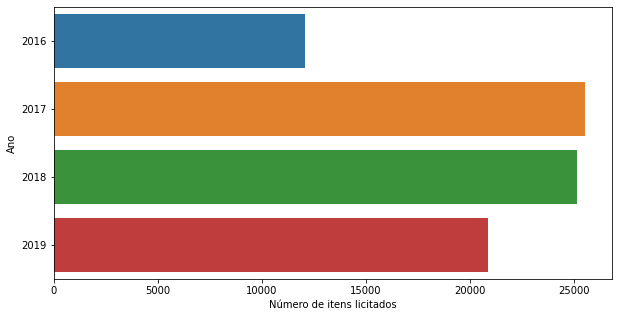

In [36]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))

sns.countplot(y=licitacoes.ANO_LICITACAO ,data=licitacoes)
plt.xlabel("Número de itens licitados")
plt.ylabel("Ano")

# Checando a estatística dos valores numéricos

In [38]:
licitacoes.describe()

VL_LICITACAO  VL_TOTAL_PROPOSTA  VL_UNITARIO_HOMOLOGADO  \
count  8.358200e+04       8.358200e+04            8.358200e+04   
mean   2.728559e+05       1.502741e+05            3.051532e+03   
std    1.779206e+06       9.265977e+05            1.119376e+05   
min    0.000000e+00       0.000000e+00            0.000000e+00   
25%    1.188050e+04       9.878860e+03            2.500000e+00   
50%    4.376327e+04       2.434330e+04            7.700000e+00   
75%    1.383742e+05       6.703420e+04            4.213750e+01   
max    3.138240e+08       4.194000e+07            2.901000e+07   

       VL_TOTAL_HOMOLOGADO  
count         8.358200e+04  
mean          1.217701e+04  
std           1.690768e+05  
min           0.000000e+00  
25%           1.098000e+02  
50%           4.425000e+02  
75%           2.042210e+03  
max           2.901000e+07

# Observando quais palavras são mais relevantes na descrição do objeto (DS_OBJETO) das compras para tentar saber quais foram os objetos que tiveram mais gastos públicos

In [39]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "aquisição", "por", "preço", "registro", 
                     "preços", "um", "através", "na", "no", "ou", 
                      "preco", "compra", "aquisição", "aquisicao", "uso", 
                      "realizada", "despesa", "2019", "nº", "rs", "bonito",
                      "processo", "objeto"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

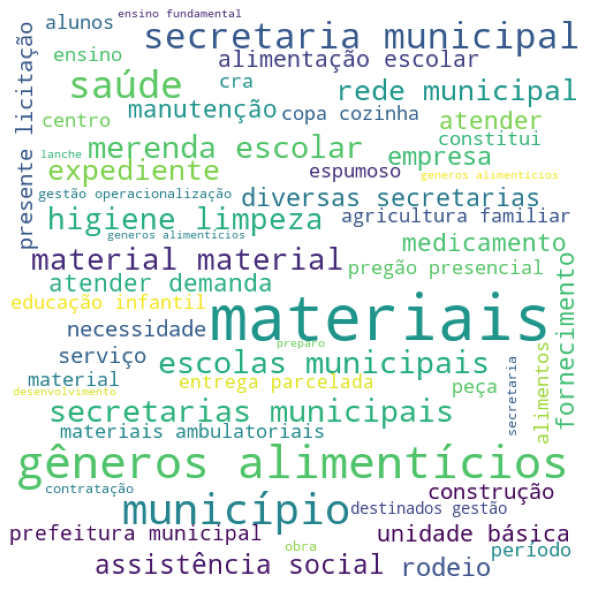

In [41]:
nuvem_palavras(licitacoes.DS_OBJETO)

# Somando todos os valores de propostas das licitações vencedoras de acordo com os nome dos orgãos, a fim de saber qual orgão pediu e recebeu mais dinheiro nas propostas do ano

In [42]:
licitacoes_vencedoras_soma = pd.DataFrame(licitacoes.groupby(['NM_ORGAO']).sum()['VL_TOTAL_PROPOSTA']).sort_values(by=['VL_TOTAL_PROPOSTA'], ascending=False)

In [43]:
licitacoes_vencedoras_soma

VL_TOTAL_PROPOSTA
NM_ORGAO                                                             
PM DE RIO GRANDE                                         4.173260e+09
CONS. PÚBL. DO EXTREMO SUL                               1.589682e+09
PM DE SÃO VICENTE DO SUL                                 1.004446e+09
PM DE PORTO ALEGRE                                       7.400623e+08
PM DE MAÇAMBARÁ                                          6.348514e+08
PM DE FREDERICO WESTPHALEN                               3.174590e+08
PM DE MORRO REUTER                                       3.164621e+08
PM DE ARROIO DO TIGRE                                    2.826508e+08
PM DE PASSO FUNDO                                        2.754247e+08
CIA. DE DESENV. DE CAXIAS DO SUL                         2.753086e+08
CIA. DE GÁS DO ESTADO DO RIO GRANDE DO SUL               2.519604e+08
PM DE ALPESTRE                                           2.001755e+08
PM DE IBIRUBÁ                                            1.596587e+08
PM DE ESPUMOSO                                           1.392516e+08
PM DE RODEIO BONITO                                      1.374025e+08
PM DE PLANALTO                                           1.300926e+08
PM DE SALTO DO JACUÍ                                     1.225196e+08
DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE          1.012775e+08
PM DE VISTA GAÚCHA                                       9.466229e+07
PM DE VIAMÃO                                             8.684035e+07
PM DE ERNESTINA                                          8.125858e+07
PM DE SALDANHA MARINHO                                   7.488859e+07
PM DE SARANDI                                            7.393385e+07
PM DE SEBERI                                             6.205196e+07
BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.                5.630785e+07
PM DE PINHAL                                             5.253763e+07
PM DE IRAÍ                                               4.871480e+07
SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL            4.816162e+07
PM DE IGREJINHA                                          4.644442e+07
PM DE LINDOLFO COLLOR                                    4.431401e+07
PM DE CAMPOS BORGES                                      4.314258e+07
CONS. INTERM. LAR DE ACOLHIMENTO SÃO FRANCISCO           4.260158e+07
CIA. CARRIS PORTO-ALEGRENSE                              4.150600e+07
PM DE TUPARENDI                                          3.902696e+07
PM DE TIO HUGO                                           3.477012e+07
PM DE FORTALEZA DOS VALOS                                3.376249e+07
FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO                  3.343402e+07
CONS. INTERM. DO MÉDIO ALTO URUGUAI                      3.066313e+07
PM DE SAGRADA FAMÍLIA                                    2.782725e+07
PM DE MORMAÇO                                            2.768530e+07
PM DE BENTO GONÇALVES                                    2.139408e+07
PM DE ESTEIO                                             1.913409e+07
PM DE CANOAS                                             1.605290e+07
COMUSA - SERVIÇOS DE ÁGUA E ESGOTO DE NOVO HAMB...       1.526415e+07
PM DE NOVA SANTA RITA                                    1.409544e+07
PM DE REDENTORA                                          1.397787e+07
PM DE BARRA DO RIO AZUL                                  1.368247e+07
FUND. DE SAÚDE PÚBLICA SÃO CAMILO DE ESTEIO - F...       1.168594e+07
CONS. INTERM. ABRIGO INSTITUCIONAL DA PAZ - CIAIP        1.055423e+07
FUND. MÉD.-HOSP. DR. HONOR T. COSTA - LAVRAS DO...       1.048042e+07
PM DE ALTO ALEGRE                                        9.649457e+06
PM DE XANGRI-LÁ                                          9.256000e+06
PM DE VENÂNCIO AIRES                                     8.636913e+06
PM DE CASCA                                              8.378116e+06
PM DE ALTO FELIZ                                         7.809738e+06
PM DE NOVA PETRÓPOLIS                                    7.625

In [44]:
pd.DataFrame(licitacoes.groupby(['NM_ORGAO']).sum()['VL_LICITACAO']).sort_values(by=['VL_LICITACAO'], ascending=False)

VL_LICITACAO
NM_ORGAO                                                        
PM DE SÃO VICENTE DO SUL                            5.409320e+09
PM DE MAÇAMBARÁ                                     3.595173e+09
CONS. PÚBL. DO EXTREMO SUL                          2.203740e+09
PM DE FREDERICO WESTPHALEN                          1.440680e+09
PM DE TUPARENDI                                     1.184170e+09
PM DE PORTO ALEGRE                                  1.163697e+09
PM DE ALPESTRE                                      1.071911e+09
PM DE ESPUMOSO                                      6.514637e+08
PM DE IBIRUBÁ                                       4.952654e+08
PM DE RODEIO BONITO                                 4.367995e+08
PM DE ERNESTINA                                     3.848086e+08
PM DE BALNEÁRIO PINHAL                              3.149100e+08
CIA. DE DESENV. DE CAXIAS DO SUL                    3.107568e+08
PM DE SEBERI                                        2.916294e+08
PM DE PASSO FUNDO                                   2.866456e+08
CIA. DE GÁS DO ESTADO DO RIO GRANDE DO SUL          2.604643e+08
PM DE IRAÍ                                          2.541001e+08
PM DE RIO GRANDE                                    2.321083e+08
PM DE PLANALTO                                      2.201563e+08
PM DE VISTA GAÚCHA                                  1.905585e+08
DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE     1.636591e+08
PM DE SALDANHA MARINHO                              1.627362e+08
PM DE FORTALEZA DOS VALOS                           1.319433e+08
PM DE CAMPOS BORGES                                 1.132963e+08
BANCO DO ESTADO DO RIO GRANDE DO SUL S.A.           1.069029e+08
PM DE SALTO DO JACUÍ                                1.019649e+08
PM DE VIAMÃO                                        9.417525e+07
PM DE SARANDI                                       8.845055e+07
PM DE IGREJINHA                                     7.421591e+07
PM DE ARROIO DO TIGRE                               6.524585e+07
SERVIÇO AUTÔN. MUN. DE ÁGUA E ESGOTO - CX.SUL       6.107748e+07
CONS. INTERM. LAR DE ACOLHIMENTO SÃO FRANCISCO      5.798882e+07
PM DE TIO HUGO                                      5.175936e+07
FUND. DE SAÚDE PÚBLICA DE NOVO HAMBURGO             4.960322e+07
PM DE LINDOLFO COLLOR                               4.647891e+07
PM DE MORMAÇO                                       4.630943e+07
CIA. CARRIS PORTO-ALEGRENSE                         4.415687e+07
PM DE MORRO REUTER                                  4.410229e+07
PM DE PINHAL                                        3.891002e+07
PM DE MARAU                                         3.418760e+07
PM DE PORTO MAUÁ                                    3.252690e+07
PM DE ALECRIM                                       3.035848e+07
PM DE ALTO ALEGRE                                   2.913120e+07
PM DE BENTO GONÇALVES                               2.846174e+07
PM DE NOVA SANTA RITA                               2.671357e+07
PM DE REDENTORA                                     2.484622e+07
PM DE SÃO PAULO DAS MISSÕES                         2.210683e+07
PM DE NOVA CANDELÁRIA                               2.175064e+07
PM DE CANOAS                                        1.915007e+07
COMUSA - SERVIÇOS DE ÁGUA E ESGOTO DE NOVO HAMB...  1.900304e+07
PM DE BARRA DO RIO AZUL                             1.722898e+07
PM DE PORTO VERA CRUZ                               1.645082e+07
PM DE SÃO MARTINHO                                  1.632294e+07
FUND. DE SAÚDE PÚBLICA SÃO CAMILO DE ESTEIO - F...  1.465402e+07
PM DE SAGRADA FAMÍLIA                               1.418277e+07
CONS. INTERM. ABRIGO INSTITUCIONAL DA PAZ - CIAIP   1.362535e+07
FUND. MÉD.-HOSP. DR. HONOR T. COSTA - LAVRAS DO...  1.230450e+07
PM DE DOUTOR MAURÍCIO CARDOSO                       1.087643e+07
PM DE SERAFINA CORRÊA                               1.062717e+07
PM DE XANGRI-LÁ                                     1.005920e+07
PM DE CASCA           

# Testando se a nuvem de palavras apresenta palavras que fazem sentido no contexto, a fim de obter informações sobre os itens comprados

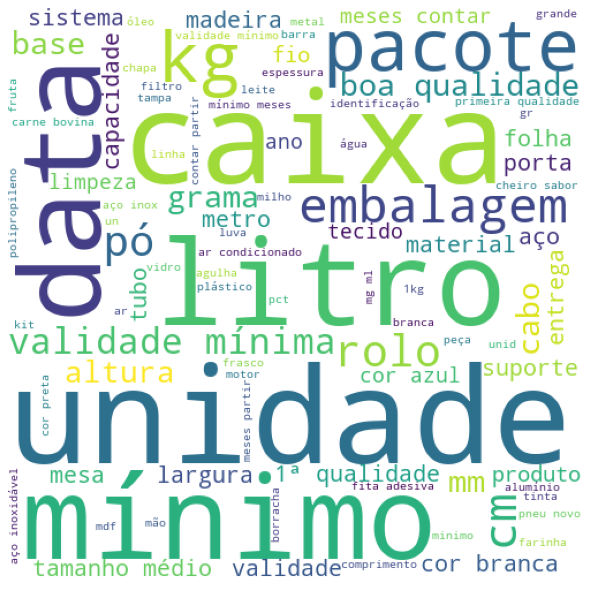

In [45]:
nuvem_palavras(licitacoes.DS_ITEM)

### Como pôde ser visto na nuvem, algumas palavras fazem sentido, mas existem outras que devem ser usadas como stop words e não devem ser levadas em consideração, como por exemplo, kg, cm, gr, largura, grama, etc. Portanto, irei testar outro caminho que seria através da frequência das palavras que mais aparecem.

In [47]:
licitacoes.DS_ITEM

0        LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...
1        LOUSA/QUADRO ESCOLAR COM MOLDURA DE ALUMÍNIO -...
2                          Aquisição Plataforma Elevatória
3        compra de 1 motocicleta, para o programa SUA N...
4        Compra de cerca e portão de PVC para o Muro da...
                               ...                        
83580    Lavador de mandioca (01 confeccionado em aço i...
83581    Câmara Fria - com PLUG-IN 220V Monofásico, Sis...
83582    Balança eletromecânica, , com indicador de pes...
83583    Equipamento para embalar a vácuo, Painel digit...
83584    Descascador de mandioca, com capacidade de pro...
Name: DS_ITEM, Length: 83582, dtype: object

# convertendo todas as palavras em minúsculas para que uma mesma palavra não seja contabilizada em 2 chaves de dicionário distintas

In [48]:
minusculas = licitacoes["DS_ITEM"].to_string().lower()

In [49]:
minusculas

'0        lousa/quadro escolar com moldura de alumínio -...\n1        lousa/quadro escolar com moldura de alumínio -...\n2                          aquisição plataforma elevatória\n3        compra de 1 motocicleta, para o programa sua n...\n4        compra de cerca e portão de pvc para o muro da...\n5        envelope branco medindo aproximadamente 34cm x...\n6        pasta pauta sulfite 75gr amarelo-claro, impres...\n7        etiquetas adesivas em papel adesivo branco ou ...\n8        cartão convite em papel linho branco 180gr, ta...\n9        envelope branco em papel cartão 120gr. (envelo...\n10       pasta pauta sulfite 75gr verde-claro, impressã...\n11       cartões de visita papel couché fosco 300gr com...\n12       folha timbrada branca offset 90 gramas, tamanh...\n13                                      camisa masc n.1 ml\n14                                      camisa masc n.2 ml\n15                                      camisa masc n.3 ml\n16                                     

# Splitando a string e armazenando em uma lista de palavras

In [50]:
lista = minusculas.split()

In [51]:
lista

['0',
 'lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 '1',
 'lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 '2',
 'aquisição',
 'plataforma',
 'elevatória',
 '3',
 'compra',
 'de',
 '1',
 'motocicleta,',
 'para',
 'o',
 'programa',
 'sua',
 'n...',
 '4',
 'compra',
 'de',
 'cerca',
 'e',
 'portão',
 'de',
 'pvc',
 'para',
 'o',
 'muro',
 'da...',
 '5',
 'envelope',
 'branco',
 'medindo',
 'aproximadamente',
 '34cm',
 'x...',
 '6',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'amarelo-claro,',
 'impres...',
 '7',
 'etiquetas',
 'adesivas',
 'em',
 'papel',
 'adesivo',
 'branco',
 'ou',
 '...',
 '8',
 'cartão',
 'convite',
 'em',
 'papel',
 'linho',
 'branco',
 '180gr,',
 'ta...',
 '9',
 'envelope',
 'branco',
 'em',
 'papel',
 'cartão',
 '120gr.',
 '(envelo...',
 '10',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'verde-claro,',
 'impressã...',
 '11',
 'cartões',
 'de',
 'visita',
 'papel',
 'couché',
 'fosco',
 '300gr',
 'com...',


# Os índices da coluna do dataframe também entraram na string e consequentemente na lista, então aqui vou removê-los

In [53]:
novos_items = [item for item in lista if not item.isdigit()]

In [54]:
novos_items

['lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 'lousa/quadro',
 'escolar',
 'com',
 'moldura',
 'de',
 'alumínio',
 '-...',
 'aquisição',
 'plataforma',
 'elevatória',
 'compra',
 'de',
 'motocicleta,',
 'para',
 'o',
 'programa',
 'sua',
 'n...',
 'compra',
 'de',
 'cerca',
 'e',
 'portão',
 'de',
 'pvc',
 'para',
 'o',
 'muro',
 'da...',
 'envelope',
 'branco',
 'medindo',
 'aproximadamente',
 '34cm',
 'x...',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'amarelo-claro,',
 'impres...',
 'etiquetas',
 'adesivas',
 'em',
 'papel',
 'adesivo',
 'branco',
 'ou',
 '...',
 'cartão',
 'convite',
 'em',
 'papel',
 'linho',
 'branco',
 '180gr,',
 'ta...',
 'envelope',
 'branco',
 'em',
 'papel',
 'cartão',
 '120gr.',
 '(envelo...',
 'pasta',
 'pauta',
 'sulfite',
 '75gr',
 'verde-claro,',
 'impressã...',
 'cartões',
 'de',
 'visita',
 'papel',
 'couché',
 'fosco',
 '300gr',
 'com...',
 'folha',
 'timbrada',
 'branca',
 'offset',
 'gramas,',
 'tamanh...',
 'camisa'

# Contando a frequência de cada palavra da lista e armazenando em um dicionário onde as chaves são as palavras e os valores são as frequências

In [55]:
import collections
contagens = dict(collections.Counter(novos_items))

In [56]:
contagens

{'lousa/quadro': 2,
 'escolar': 226,
 'com': 10807,
 'moldura': 17,
 'de': 33412,
 'alumínio': 132,
 '-...': 117,
 'aquisição': 629,
 'plataforma': 6,
 'elevatória': 1,
 'compra': 16,
 'motocicleta,': 1,
 'para': 7449,
 'o': 242,
 'programa': 15,
 'sua': 8,
 'n...': 121,
 'cerca': 10,
 'e': 3201,
 'portão': 7,
 'pvc': 867,
 'muro': 2,
 'da...': 33,
 'envelope': 224,
 'branco': 887,
 'medindo': 258,
 'aproximadamente': 54,
 '34cm': 12,
 'x...': 62,
 'pasta': 567,
 'pauta': 2,
 'sulfite': 92,
 '75gr': 4,
 'amarelo-claro,': 1,
 'impres...': 9,
 'etiquetas': 23,
 'adesivas': 4,
 'em': 5408,
 'papel': 1891,
 'adesivo': 132,
 'ou': 581,
 '...': 5526,
 'cartão': 46,
 'convite': 5,
 'linho': 16,
 '180gr,': 1,
 'ta...': 41,
 '120gr.': 1,
 '(envelo...': 1,
 'verde-claro,': 1,
 'impressã...': 3,
 'cartões': 3,
 'visita': 7,
 'couché': 1,
 'fosco': 12,
 '300gr': 19,
 'com...': 311,
 'folha': 513,
 'timbrada': 12,
 'branca': 650,
 'offset': 2,
 'gramas,': 45,
 'tamanh...': 29,
 'camisa': 153,
 'mas

# Ordenando o dicionário do maior para o menor para uma melhor visualização

In [62]:
contagens_ordenadas = dict(sorted(contagens.items(), key=lambda x: x[1], reverse=True))

In [58]:
contagens_ordenadas

{'de': 33412,
 'com': 10807,
 'para': 7449,
 '-': 5959,
 '...': 5526,
 'em': 5408,
 'x': 3688,
 'e': 3201,
 'tipo': 2829,
 'c/': 2310,
 'embalagem': 2107,
 'papel': 1891,
 'tamanho': 1677,
 'cor': 1645,
 'sem': 1540,
 'a': 1521,
 'pneu': 1516,
 'mg': 1420,
 'caixa': 1366,
 'nº': 1328,
 'ml': 1316,
 'kg': 1278,
 'mm': 1278,
 'cm': 1248,
 'pacote': 1246,
 'fita': 1150,
 'pó': 1082,
 'material': 1078,
 'tecido': 1015,
 'do': 1008,
 'aço': 1005,
 'tinta': 904,
 'qualidade,': 896,
 'branco': 887,
 'pvc': 867,
 'cabo': 845,
 'cx': 843,
 'no': 831,
 'pct': 817,
 'carne': 817,
 'cola': 813,
 'p/': 808,
 'luva': 806,
 'óleo': 806,
 'litros': 802,
 'unidades': 801,
 'g': 790,
 'leite': 788,
 'doce': 786,
 'tubo': 785,
 '¿': 775,
 'cores': 758,
 'saco': 742,
 'ar': 728,
 'gr': 727,
 'c...': 722,
 'm': 713,
 '100%': 708,
 'farinha': 703,
 'da': 692,
 'milho': 660,
 'branca': 650,
 '1ª': 648,
 'filtro': 648,
 'massa': 647,
 'rolo': 639,
 'preto': 639,
 'biscoito': 633,
 'aquisição': 629,
 'grande':

# Criando a lista de palavras que não deve ser contabilizada

In [63]:
# Lista de palavras que não serão contabilizadas
novas_stopwords = ["de", "da", "do", "para", "dos", "das", "cor", "...", "tamanho",
                     "em", "aquisição", "por", "preço", "registro", "mm", "cm","mg",
                     "preços", "um", "através", "na", "no", "ou", "a", "kg", "ml", "cx",
                     "compra", "aquisicao", "uso", "com", "x", "e", "-", "¿", "qualidade,",
                      "nº","processo", "objeto", "p/", "c/", "100%", "tipo", "sem"]

# Removendo as stop words do dicionário

In [64]:
for chave in novas_stopwords:
    contagens_ordenadas.pop(chave)

In [65]:
contagens_ordenadas

{'embalagem': 2107,
 'papel': 1891,
 'pneu': 1516,
 'caixa': 1366,
 'pacote': 1246,
 'fita': 1150,
 'pó': 1082,
 'material': 1078,
 'tecido': 1015,
 'aço': 1005,
 'tinta': 904,
 'branco': 887,
 'pvc': 867,
 'cabo': 845,
 'pct': 817,
 'carne': 817,
 'cola': 813,
 'luva': 806,
 'óleo': 806,
 'litros': 802,
 'unidades': 801,
 'g': 790,
 'leite': 788,
 'doce': 786,
 'tubo': 785,
 'cores': 758,
 'saco': 742,
 'ar': 728,
 'gr': 727,
 'c...': 722,
 'm': 713,
 'farinha': 703,
 'milho': 660,
 'branca': 650,
 '1ª': 648,
 'filtro': 648,
 'massa': 647,
 'rolo': 639,
 'preto': 639,
 'biscoito': 633,
 'grande': 628,
 'verde': 627,
 'boa': 626,
 'mínimo': 602,
 'fio': 596,
 'pincel': 591,
 'pão': 579,
 'pasta': 567,
 '+': 558,
 'plástico': 553,
 'novo': 541,
 'qualidade': 540,
 'frasco': 534,
 'caneta': 517,
 'concreto': 515,
 'lixo': 515,
 'folha': 513,
 'azul': 504,
 'hp': 503,
 'agulha': 502,
 'folhas': 502,
 'd...': 501,
 'base': 492,
 'medicamentos': 491,
 'mesa': 487,
 'capacidade': 487,
 'un':

# Selecionando as 15 palavras com mais frequência para fazer um gráfico de barras

In [66]:
import itertools
itens_despesas = dict(itertools.islice(contagens_ordenadas.items(), 0, 15))

In [67]:
itens_despesas

{'embalagem': 2107,
 'papel': 1891,
 'pneu': 1516,
 'caixa': 1366,
 'pacote': 1246,
 'fita': 1150,
 'pó': 1082,
 'material': 1078,
 'tecido': 1015,
 'aço': 1005,
 'tinta': 904,
 'branco': 887,
 'pvc': 867,
 'cabo': 845,
 'pct': 817}

# Gráfico de barras com as palavras que aparecem com mais frequência na descrição dos itens, assim podemos saber os itens que estão relacionados com os maiores gastos

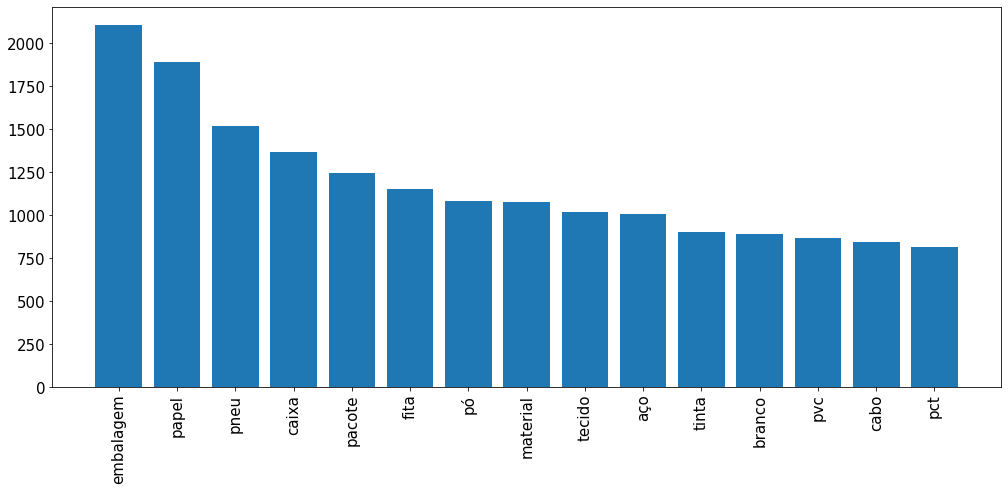

In [68]:
keys = itens_despesas.keys()
values = itens_despesas.values()
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(17,7))
plt.bar(keys, values)
plt.xticks(range(15), rotation='vertical')
plt.show()

# Usando a Lei de Benford para estudar as amostras do mesmo tipo, buscando encontrar dados inconsistêntes, errôneos ou até mesmo fraudes

In [69]:
import benford as bf

# Fazendo o estudo relacionado aos valores homologados dos itens

In [70]:
item_bf = licitacoes.VL_TOTAL_HOMOLOGADO

### Aqui estou levando em consideração os primeiros 2 dígitos (10 - 99). Os dígitos em amarelo são os dígitos considerados inconsistentes, ou seja, esse dígitos acharam inconsistência nos dados


Initialized sequence with 83014 registries.
First_2_Dig
10    0.039391
11    0.036753
12    0.033597
13    0.030441
14    0.032187
15    0.028790
16    0.024791
17    0.025478
18    0.023707
19    0.026152
20    0.020852
21    0.017985
22    0.019190
23    0.017624
24    0.020647
25    0.017334
26    0.015130
27    0.015250
28    0.014576
29    0.016021
30    0.015985
31    0.012118
32    0.012420
33    0.011781
34    0.012576
35    0.013395
36    0.012058
37    0.010986
38    0.010817
39    0.013877
40    0.012323
41    0.008300
42    0.010010
43    0.008794
44    0.010299
45    0.010119
46    0.008372
47    0.008746
48    0.009577
49    0.010251
50    0.010805
51    0.007059
52    0.008553
53    0.006312
54    0.008625
55    0.007348
56    0.006842
57    0.006806
58    0.006445
59    0.009035
60    0.010781
61    0.004650
62    0.005638
63    0.006059
64    0.006710
65    0.006035
66    0.005589
67    0.005686
68    0.005698
69    0.006878
70    0.008396
71    0.005276
72    0.00692

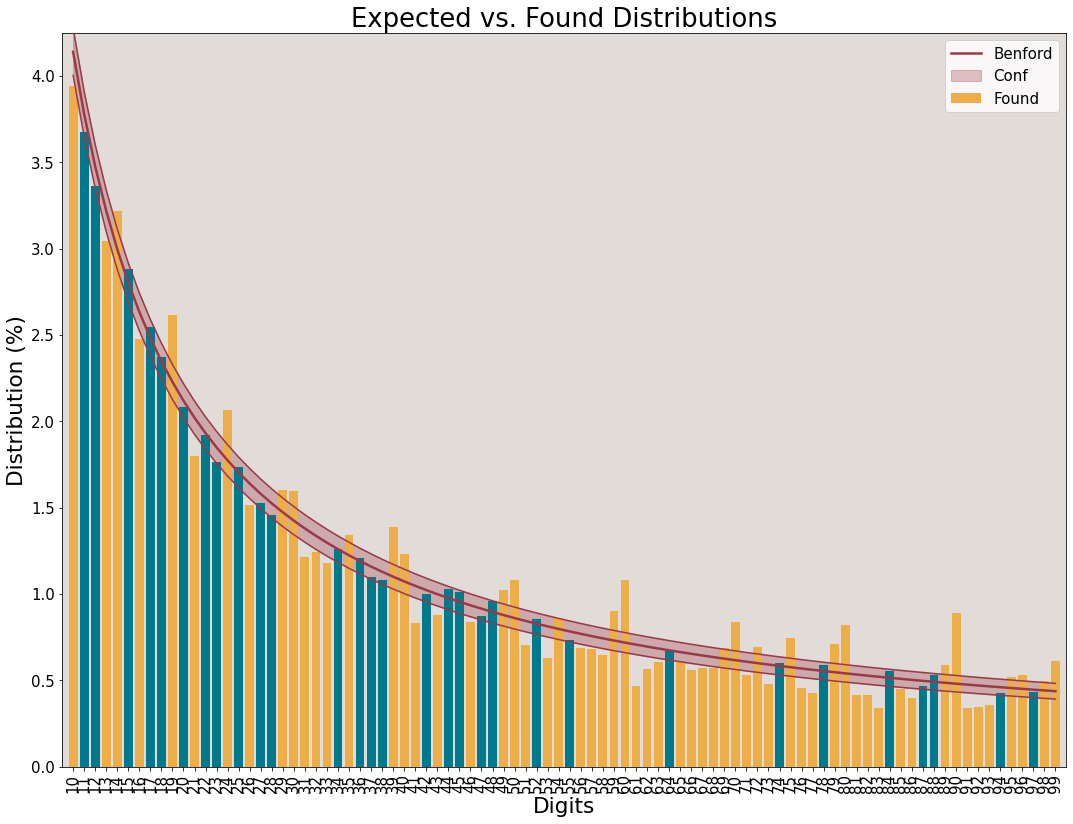

In [71]:
f2d = bf.first_digits(item_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (90, 60 e 80)

In [72]:
itens_digitos = licitacoes

# Convertendo a coluna de float para string

In [73]:
itens_digitos['VL_TOTAL_HOMOLOGADO'] = itens_digitos['VL_TOTAL_HOMOLOGADO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 90, 60 ou 80

In [74]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_HOMOLOGADO'].str.startswith(('90', '60', '80'))])

In [75]:
dados_incosistentes

CD_ORGAO                                           NM_ORGAO  \
58       53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
78       53411  INST. DE PREV. E ASSIST. DOS SERV. MUNIC. DE N...   
112      45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
127      45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
165      45004                   CIA. DE DESENV. DE CAXIAS DO SUL   
...        ...                                                ...   
83406    55900                                PM DE RODEIO BONITO   
83442    55900                                PM DE RODEIO BONITO   
83514    48400                         PM DE FREDERICO WESTPHALEN   
83527    69900                                       PM DE PINHAL   
83545    54900                                 PM DE PORTO ALEGRE   

      NR_LICITACAO ANO_LICITACAO CD_TIPO_MODALIDADE     NR_PROCESSO  \
58             7.0          2016                PRP  2016.52.300604   
78             7.0          2016                PRP  2016.52.300604   
112           33.0          2016                PRP             033   
127           33.0          2016                PRP             033   
165           33.0          2016                PRP             033   
...            ...           ...                ...             ...   
83406          7.0          2019                CNV              35   
83442          7.0          2019                CNV              35   
83514         45.0          2019                PRP              80   
83527          8.0          2019                PRP              81   
83545         50.0          2019                PRE   1900000350551   

      ANO_PROCESSO TP_OBJETO CD_TIPO_FASE_ATUAL TP_LICITACAO  ...  \
58            2016       COM                ADH          MPR  ...   
78            2016       COM                ADH          MPR  ...   
112           2016       COM                ADH          MPR  ...   
127           2016       COM                ADH          MPR  ...   
165           2016       COM                ADH          MPR  ...   
...            ...       ...                ...          ...  ...   
83406         2019       COM                ADH          MPR  ...   
83442         2019       COM                ADH          MPR  ...   
83514         2019       COM                ADH          MPR  ...   
83527         2019       COM                ADH          MPR  ...   
83545         2019       COM                ADH          MPR  ...   

      TP_RESULTADO_PROPOSTA  NR_LOTE NR_ITEM NR_ITEM_ORIGINAL  \
58                        C        1       3                3   
78                        C        1       9                9   
112                       C        1     137              137   
127                       C        1     172              172   
165                       C        1      10               10   
...                     ...      ...     ...              ...   
83406                     C        1      97               97   
83442                     C        1      34               34   
83514                     C        1       8                8   
83527                     C        1      14               14   
83545                     C        1       3          2007260   

                                                 DS_ITEM QT_ITENS  \
58     IMPRESSO: AUTORIZAÇÕES MÉDICAS – CAIXA COM 300...     48.0   
78     IMPRESSO: CONTROLE DE PRESSÃO E GLICOSE (BLOCO...     10.0   
112    Terminal Flange reto SAE Cod. 61 1 1/4 p/ mang. 1     15.0   
127    Proteção para Mangueira 3/8   fabricada em Pol...    150.0   
165                   Mangueira SAE 100 R2 tipo at – 3/8    300.0   
...                                                  ...      ...   
83406                     LIXA DUPLA ABRASIVA EM ESPONJA     5.00   
83442      GUIRLANDA DE PALHA 0,30 X 0,30 CM DE DIÂMETRO    80.00   
83514  NOBREAK de 700 VA entrada 220v e saída 110v, c...     3.00   
83527                   

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_HOMOLOGADO

In [76]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                                  188
PM DE RIO GRANDE                                            179
PM DE SÃO VICENTE DO SUL                                    107
PM DE MAÇAMBARÁ                                             102
PM DE SALTO DO JACUÍ                                         94
PM DE ARROIO DO TIGRE                                        90
PM DE SEBERI                                                 76
PM DE ALPESTRE                                               73
PM DE ERNESTINA                                              68
PM DE RODEIO BONITO                                          62
PM DE VISTA GAÚCHA                                           53
PM DE CAMPOS BORGES                                          51
PM DE ESPUMOSO                                               50
PM DE PINHAL                                                 47
PM DE MORRO REUTER                                           46
PM DE IBIRUBÁ                           

# Fazendo o estudo relacionado aos valores totais das propostas

In [77]:
total_proposta_bf = licitacoes.VL_TOTAL_PROPOSTA


Initialized sequence with 83580 registries.
First_2_Dig
10    0.035822
11    0.033154
12    0.036899
13    0.033896
14    0.035690
15    0.029541
16    0.026358
17    0.023630
18    0.026143
19    0.023774
20    0.020495
21    0.019646
22    0.020519
23    0.020352
24    0.020986
25    0.016260
26    0.019287
27    0.013209
28    0.013029
29    0.013855
30    0.015733
31    0.012838
32    0.010373
33    0.014393
34    0.015997
35    0.010983
36    0.013891
37    0.013436
38    0.011163
39    0.009213
40    0.011079
41    0.009177
42    0.008375
43    0.010230
44    0.012575
45    0.008124
46    0.010613
47    0.006461
48    0.006198
49    0.008746
50    0.007143
51    0.004846
52    0.005958
53    0.012934
54    0.007011
55    0.009033
56    0.006006
57    0.007992
58    0.005348
59    0.007825
60    0.009021
61    0.006712
62    0.008507
63    0.006688
64    0.005013
65    0.004750
66    0.009608
67    0.007873
68    0.006198
69    0.006473
70    0.004427
71    0.003410
72    0.00489

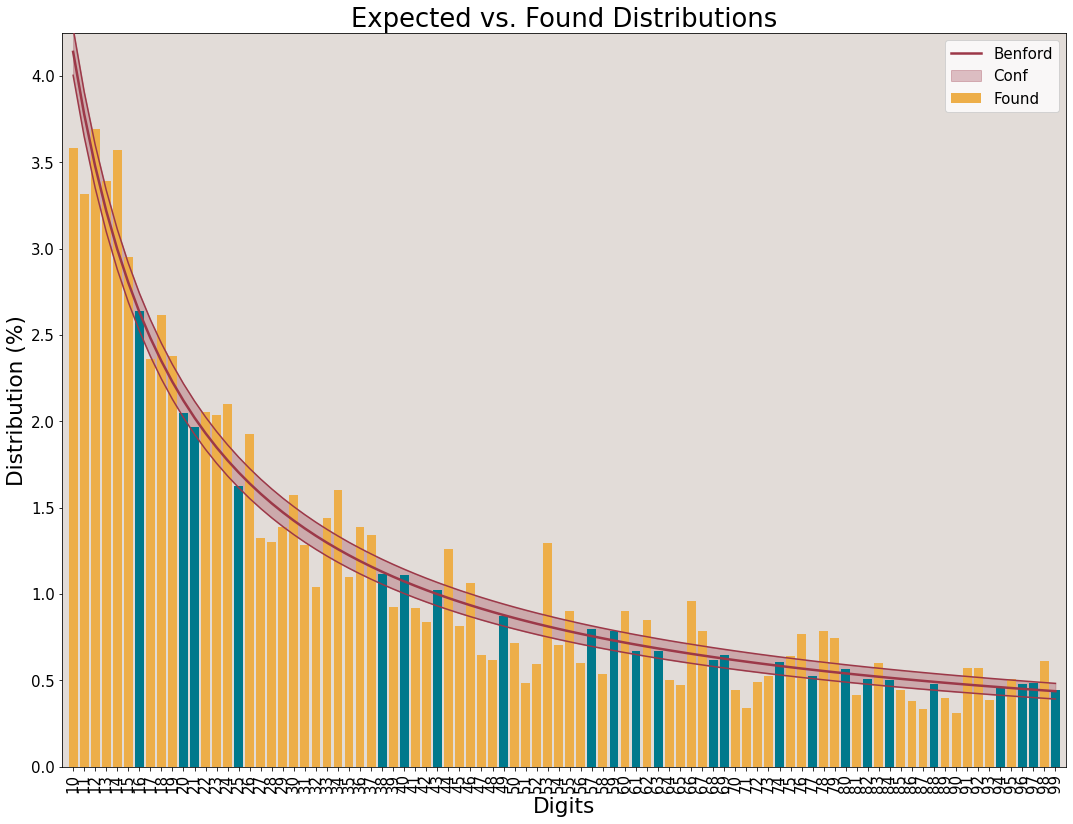

In [78]:
f2d = bf.first_digits(total_proposta_bf, digs=2, decimals=8, confidence=95)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (53, 66 e 14)

In [79]:
itens_digitos = licitacoes

# Convertendo a coluna de float para string

In [80]:
itens_digitos['VL_TOTAL_PROPOSTA'] = itens_digitos['VL_TOTAL_PROPOSTA'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 53, 66 e 14

In [81]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_TOTAL_PROPOSTA'].str.startswith(('53', '66', '14'))])

In [82]:
dados_incosistentes

CD_ORGAO                                         NM_ORGAO NR_LICITACAO  \
5        62501                                    CM DE VACARIA          2.0   
6        62501                                    CM DE VACARIA          2.0   
7        62501                                    CM DE VACARIA          2.0   
8        62501                                    CM DE VACARIA          2.0   
9        62501                                    CM DE VACARIA          2.0   
...        ...                                              ...          ...   
83339    54907  DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE        140.0   
83340    54907  DEP. MUNICIPAL DE ÁGUA E ESGOTOS - PORTO ALEGRE        140.0   
83519    48400                       PM DE FREDERICO WESTPHALEN         45.0   
83551    48400                       PM DE FREDERICO WESTPHALEN         39.0   
83557    41200                            PM DE ARROIO DO TIGRE         24.0   

      ANO_LICITACAO CD_TIPO_MODALIDADE     NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
5              2016                CNV              03         2016       COM   
6              2016                CNV              03         2016       COM   
7              2016                CNV              03         2016       COM   
8              2016                CNV              03         2016       COM   
9              2016                CNV              03         2016       COM   
...             ...                ...             ...          ...       ...   
83339          2019                PRE  19100000020737         2019       COM   
83340          2019                PRE  19100000020737         2019       COM   
83519          2019                PRP              80         2019       COM   
83551          2019                PRP              69         2019       COM   
83557          2019                PRP              45         2019       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA  NR_LOTE  \
5                    ADH          MPR  ...                     C        1   
6                    ADH          MPR  ...                     C        1   
7                    ADH          MPR  ...                     C        1   
8                    ADH          MPR  ...                     C        1   
9                    ADH          MPR  ...                     C        1   
...                  ...          ...  ...                   ...      ...   
83339                ADH          MPR  ...                     C        1   
83340                ADH          MPR  ...                     C        1   
83519                ADH          MPR  ...                     C        1   
83551                ADH          MPR  ...                     C        1   
83557                ADH          MPR  ...                     C        1   

      NR_ITEM NR_ITEM_ORIGINAL  \
5           7                7   
6           3                3   
7           8                8   
8           6                6   
9           5                5   
...       ...              ...   
83339       2          1097013   
83340       1          1097005   
83519      17               17   
83551       6                6   
83557       3                3   

                                                 DS_ITEM QT_ITENS  \
5      Envelope branco medindo aproximadamente 34cm x...    500.0   
6      Pasta pauta sulfite 75gr amarelo-claro, impres...    300.0   
7      Etiquetas adesivas em papel adesivo branco ou ...   2000.0   
8      Cartão convite em papel linho branco 180gr, ta...   2000.0   
9      Envelope branco em papel cartão 120gr. (envelo...   2000.0   
...                                                  ...      ...   
83339       Anel circular de concreto armado 600 x 200mm   180.00   
83340      Anel circular de concreto simples 400 x 200mm   500.00   
83519  Tablet: Sietema operacional android, processad...     2.00   
83551  TACHÕES 50MM(A)X150MM(L)X250MM(C) COR AMA

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_TOTAL_PROPOSTA

In [83]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                                  453
PM DE ALPESTRE                                              405
PM DE ERNESTINA                                             361
PM DE CAMPOS BORGES                                         262
PM DE RIO GRANDE                                            240
PM DE SÃO VICENTE DO SUL                                    211
PM DE RODEIO BONITO                                         196
PM DE SEBERI                                                193
PM DE MORRO REUTER                                          155
CIA. DE DESENV. DE CAXIAS DO SUL                            152
PM DE SALTO DO JACUÍ                                        147
PM DE IBIRUBÁ                                               144
PM DE ARROIO DO TIGRE                                       138
PM DE UNIÃO DA SERRA                                        136
PM DE MORMAÇO                                               118
CONS. INTERM. DO MÉDIO ALTO URUGUAI     

# Fazendo o estudo relacionado aos valores de licitação

In [84]:
vl_licitacao_bf = licitacoes.VL_LICITACAO


Initialized sequence with 69318 registries.
First_2_Dig
10    0.030454
11    0.039413
12    0.044231
13    0.037104
14    0.019374
15    0.029040
16    0.023197
17    0.025073
18    0.024784
19    0.020846
20    0.015999
21    0.021134
22    0.021611
23    0.015624
24    0.025188
25    0.018033
26    0.015292
27    0.014614
28    0.013748
29    0.015624
30    0.013604
31    0.012075
32    0.018552
33    0.016359
34    0.013301
35    0.011051
36    0.014527
37    0.015047
38    0.019706
39    0.008988
40    0.005799
41    0.008973
42    0.005612
43    0.005655
44    0.013633
45    0.010416
46    0.011440
47    0.014484
48    0.010733
49    0.005035
50    0.014224
51    0.016331
52    0.005165
53    0.005439
54    0.009810
55    0.006838
56    0.003448
57    0.004573
58    0.003578
59    0.012637
60    0.006723
61    0.007256
62    0.007011
63    0.006477
64    0.009190
65    0.007300
66    0.005439
67    0.006160
68    0.007444
69    0.004386
70    0.009319
71    0.007992
72    0.00240

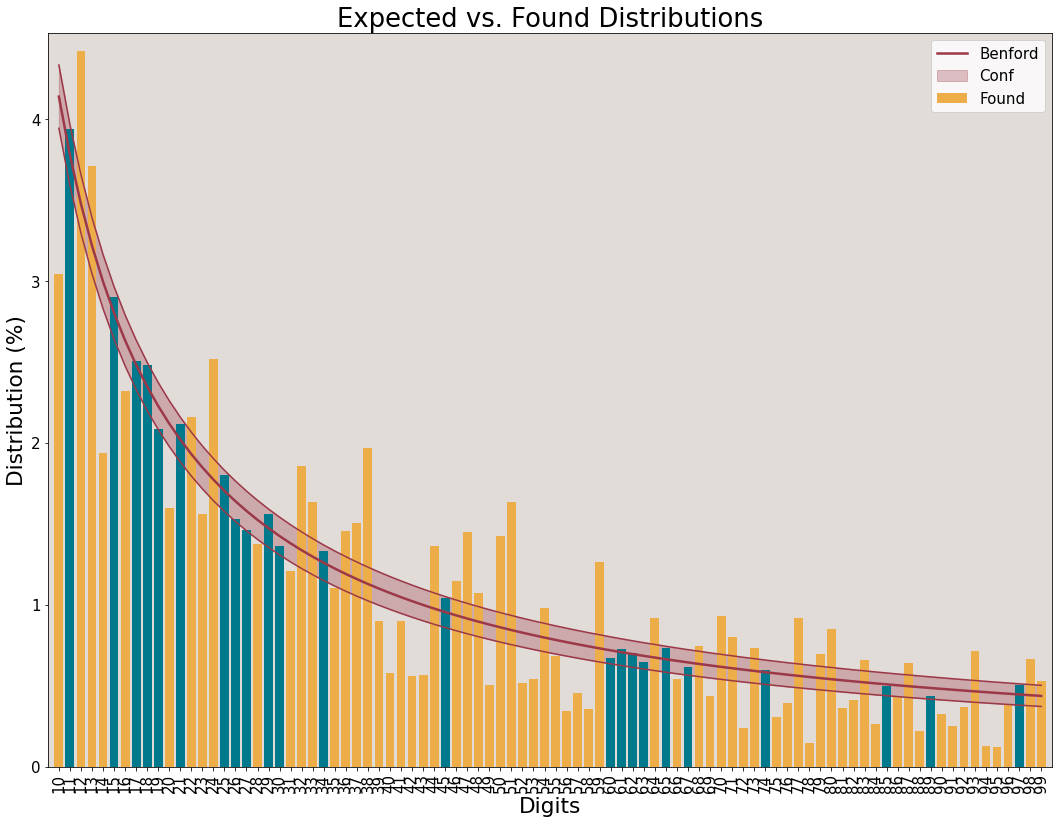

In [85]:
f2d = bf.first_digits(vl_licitacao_bf, digs=2, decimals=8, confidence=99)

# Cruzando os dígitos com o dataframe

### Copiando o dataframe para alterar o novo, selecionando apenas os 3 primeiro dígitos com mais inconsistência (51, 38 e 59)

In [86]:
itens_digitos = licitacoes

# Convertendo a coluna de float para string

In [87]:
itens_digitos['VL_LICITACAO'] = itens_digitos['VL_LICITACAO'].astype(str)

# Selecionando as linhas cujos valores de VL_TOTAL_HOMOLOGADO começam com 51, 38 e 59

In [88]:
dados_incosistentes = pd.DataFrame(itens_digitos.loc[itens_digitos['VL_LICITACAO'].str.startswith(('51', '38', '59'))])

In [89]:
dados_incosistentes

CD_ORGAO                    NM_ORGAO NR_LICITACAO ANO_LICITACAO  \
2        47701               CM DE ESTRELA          1.0          2016   
458      88029         PM DE CORONEL PILAR         22.0          2016   
1245     40300               PM DE ALECRIM          4.0          2016   
1665     80700  PM DE SÃO JOSÉ DO INHACORÁ         10.0          2016   
1666     80700  PM DE SÃO JOSÉ DO INHACORÁ         10.0          2016   
...        ...                         ...          ...           ...   
83032    73200          PM DE VISTA GAÚCHA          9.0          2019   
83033    73200          PM DE VISTA GAÚCHA          9.0          2019   
83034    73200          PM DE VISTA GAÚCHA          9.0          2019   
83246    73300      PM DE SALDANHA MARINHO          9.0          2019   
83249    54700              PM DE PLANALTO          7.0          2019   

      CD_TIPO_MODALIDADE NR_PROCESSO ANO_PROCESSO TP_OBJETO  \
2                    PRP        6762         2016       COM   
458                  PRP         525         2016       COM   
1245                 PRE          23         2016       COM   
1665                 CNV          10         2016       COM   
1666                 CNV          10         2016       COM   
...                  ...         ...          ...       ...   
83032                PRP          22         2019       COM   
83033                PRP          22         2019       COM   
83034                PRP          22         2019       COM   
83246                PRP          19         2019       COM   
83249                PRP          33         2019       COM   

      CD_TIPO_FASE_ATUAL TP_LICITACAO  ... TP_RESULTADO_PROPOSTA NR_LOTE  \
2                    ADH          MPR  ...                     C       1   
458                  ADH          MPR  ...                     C       1   
1245                 ADH          MPR  ...                     C       1   
1665                 ADH          MPR  ...                     C       1   
1666                 ADH          MPR  ...                     C       1   
...                  ...          ...  ...                   ...     ...   
83032                ADH          MPR  ...                     C       1   
83033                ADH          MPR  ...                     C       1   
83034                ADH          MPR  ...                     C       1   
83246                ADH          MPR  ...                     C       1   
83249                ADH          MPR  ...                     C       1   

      NR_ITEM NR_ITEM_ORIGINAL  \
2           1                1   
458         1                1   
1245        1             3518   
1665        7             6853   
1666        1            12299   
...       ...              ...   
83032       8                8   
83033       7                7   
83034       6                6   
83246       1                1   
83249       1                1   

                                                 DS_ITEM QT_ITENS  \
2                        Aquisição Plataforma Elevatória      1.0   
458    Microcomputador (Modelo de referência processa...      1.0   
1245   VEÍCULO NOVO ZERO KM VEÍCULO ZERO KM; ANO DE F...      1.0   
1665           TÁBUA DE PINUS P/ CAIXARIA, 25X2,5X300 CM      5.0   
1666   FERRO DE CONSTRUÇÃO CA-50 12.50 MM, 1/2", DE 12 M     25.0   
...                                                  ...      ...   
83032                Joelho Soldável 90º de PVC de 25 mm    80.00   
83033                Joelho Soldável 90º de PVC de 20 mm    80.00   
83034                                   Cola de Cano 75g   200.00   
83246  PÁ CARREGADEIRA NOVA, CABINE FECHADA COM PROTE...     1.00   
83249  VEÍCULO TIPO HATCH ZERO KM 2019, PARA TRANSPOR...     1.00   

      SG_UNIDADE_MEDIDA VL_UNITARIO_HOMOLOGADO VL_TOTAL_HOMOLOGADO  \
2                    UN               47900.00             47900.0   
458                  UN                3250.00              3250.0   
1245       

# Checando quais orgão tiveram mais dados inconsistentes referentes à coluna VL_LICITACAO

In [90]:
dados_incosistentes['NM_ORGAO'].value_counts()

PM DE FREDERICO WESTPHALEN                                  400
PM DE VISTA GAÚCHA                                          391
PM DE PLANALTO                                              288
PM DE ERNESTINA                                             220
PM DE MORMAÇO                                               206
PM DE RODEIO BONITO                                         190
PM DE SEBERI                                                165
PM DE SALDANHA MARINHO                                      151
PM DE IBIRUBÁ                                               145
PM DE CAMPOS BORGES                                         143
PM DE PINHAL                                                142
PM DE VICTOR GRAEFF                                          96
PM DE SALTO DO JACUÍ                                         93
PM DE ALPESTRE                                               89
PM DE SANTA CLARA DO SUL                                     71
PM DE ANTA GORDA                        